# TP 1: Ramón Daniel Regueiro Espiño

## Exercise  3 : Stochastic Gradient Learning in Neural Networks

### 1. Décrire et implementer l'agorithme pour notre cas

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

La méthode qu'on utilisera est pour le cas où on a un nombre fini d'observations $N$. Par contre, on peut considérer la version avec un critére d'arrêt lié, par exemple, à la variation du risque empirique, ou que la différence entre l'éstimateur pour deux estimations soit inférieur à certain valeur.

La méthode du gradient stochastique de descent traite le problème de minimiser une fonction de la forme:
    $$min_{w} J(w) = min_{w} E_z[j(w,z)].$$
    
Dans notre cas, on considére la fonction du risque empirique:

$$R_n(w) = \frac{1}{n} \sum_{i=1}^n (y_i − w^tx_i)^2.$$

Alors, on a $$E_z[j(w,z)]=R_n(w).$$

Le but de cet algorithme est d'éviter le coût de calculer les espéranves chaque fois. Donc, dans chaque cas l'algorithme sélectionne une itération aléatoire et il met à jour le paramétre. On considérera faire en premier lieu un ordonnacement aléatoire de nos observations.

En relation à la convergence de notre algorithme, on utilisera le théorème de convergence en moyenne quadratique.

Dans ce cas, pour vérifier (H3), on doit avoir la condition de que le gradient soit bornée.
Pour un $w$ et $z_i=(x_i,y_i)$, on a que
$$\triangledown_w j(w,z_i)= -2 \cdot x_i \cdot (y_i- w^t x_i).$$

Alors, la condition ne se vérifie pas si on ne met pas des restrictions sur $w$. Pour la vérifier, on considérera la projection sur la boule centrée de rayon l'unité.

Pour vérifier (H5), il faut que la suite $(\epsilon_k)_{k\in \mathbb{N}^*}$ vérifie:

1. $\epsilon_k >0$  $ \forall k,$
2. $\sum_{k=1}^{+ \infty} \epsilon_k=+\infty$ et
3. $\sum_{k=1}^{+ \infty} \epsilon_k^2<+\infty$.

Donc, on sélectionnera $(\frac{1}{k^{0.6}})_{k\in \mathbb{N}^*}$. On remarque qu'on a méntionné dans le cours l'intêret de ce choix.



In [2]:
def sto_grad_algo(x,y):
    # INPUT
    # x: valeurs des variables explicatives pour les données
    # y: valeurs du cible pour les données
    # OUTPUT
    # sol: estimation de w
    import numpy as np
    def boule(x):
        aux=np.linalg.norm(x)
        if aux>1:
            x=x/aux
        return x
    N=len(y)
    epsilon=[1/(n**0.6) for n in range(1,N+1)]
    l=list(range(N))
    random.shuffle(l)
    w_init=np.random.rand(len(x[0]))
    w_init=boule(w_init)
    for i in range(N):
        w_aux=w_init+epsilon[i]*2*(y[l[i]]-x[l[i]].dot(w_init))*x[l[i]]
        w_init=boule(w_aux)
    sol=w_init/np.linalg.norm(w_init)
    return sol

### 2. Sample a set of observations $\{z_i\}^{n}_{i=1}$ by generating a collection of random points $x_i$ of $\mathbb{R}^2$, $\bar{w} \in \mathbb{R}^2$ seen as the normal vector of an hyperplane, a straight line here, and assigning the label $y_i$ according to the side of the hyperplane the point $x_i$ is.


On considérara 5000 points générés par $Z_x\sim \mathcal{N}(0,1)$ et $Z_y \sim \mathcal{N}(0,1)$ et $\bar{w}$ comme le vecteur normal obtenu à partir de la droite $x=y$.

In [3]:
n=5000
x=[]
for i in range(n):
    aux=np.random.normal(0,1,2)
    x.append(aux)
x=np.asarray(x)
# obtention de w_bar
w_clas=np.array([1,-1])
w_clas=w_clas/np.sqrt(w_clas.dot(w_clas))
# Classification:
y=x.dot(w_clas)
y=np.where(y>0,1,-1)

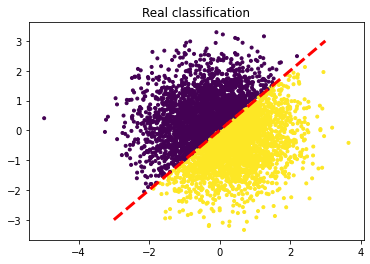

In [4]:
plt.figure()
plt.scatter(x[:,0],x[:,1],c=y,s=9)
plt.plot([-3,3],[-3,3],color='red',linestyle='--',linewidth=3)
plt.title('Real classification')
plt.show()

### 3. Test the algorithm you wrote at the first question over these observations. What is the vector $w^⋆$ estimated ? Is it far from $\bar{w}$ ?

In [5]:
w_bar=np.array([1,1])
w_bar=w_bar/np.sqrt(w_bar.dot(w_bar))
w_estim=sto_grad_algo(x,y)
print('Estimation w*:',w_estim)
print('Distance du vecteur:',np.linalg.norm(w_estim-w_clas))

Estimation w*: [ 0.67106204 -0.7414012 ]
Distance du vecteur: 0.04975269598290647


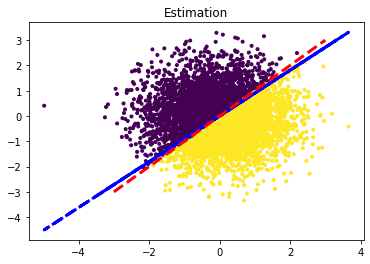

In [6]:
def f(x,coef_1,coef_2):
    return -x*coef_1/coef_2

plt.figure()
plt.scatter(x[:,0],x[:,1],c=y,s=9)
x_line = np.linspace(0,1,100)

plt.plot(x, f(x,w_estim[0],w_estim[1]),color='blue',linestyle='--',linewidth=3)

plt.plot([-3,3],[-3,3],color='red',linestyle='--',linewidth=3)
plt.title('Estimation')
plt.show()

On a obtenu que la distance de $w^*$ à $\bar{w}$ n'est pas très grand. Par contre, on va faire un petit analyse pour voir comme ça change en fonction du nombre d'observations. Pour réduire l'effet de l'áléatoire, on fera une moyenne de 10 fois par nombre de données.

In [7]:
def analyse_convergence(n):
    # INPUT
    # n: number of observations
    # OUTPUT
    # dist: distance to the real vector
    x=[]
    for i in range(n):
        aux=np.random.normal(0,1,2)
        x.append(aux)
    x=np.asarray(x)
    w_bar=np.array([1,1])
    w_clas=np.array([1,-1])
    w_clas=w_clas/np.sqrt(w_clas.dot(w_clas))
    y=x.dot(w_clas)
    y=np.where(y>0,1,-1)
    w_bar=w_bar/np.sqrt(w_bar.dot(w_bar))
    w_estim=sto_grad_algo(x,y)
    dist=np.linalg.norm(w_estim-w_clas)
    return dist

In [8]:
test=[]
N=[(1+2*i)*1000 for i in range(20)]
for i in N:
    test_aux=[]
    for j in range(10):
        dist=analyse_convergence(i)
        test_aux.append(dist)
    test.append(np.mean(test_aux))

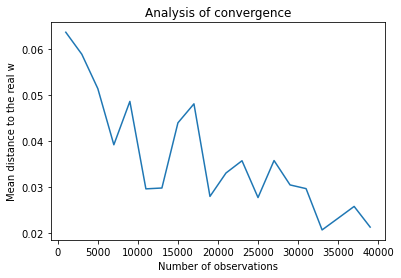

In [9]:
plt.figure()
plt.plot(N,test)
plt.xlabel('Number of observations')
plt.ylabel('Mean distance to the real w')
plt.title('Analysis of convergence')
plt.show()

On peut voir que la distance moyenne est plus petite quand on augmente le nombre d'observations. Alors, il semble que l'algorithme peut être bien déssiné pour ce type de données.

### 4. Noise your observations $\{z_i\}^{n}_{i=1}$ with an additive Gaussian noise and perform the optimisation again. Compare with the result of question three.

On va ajouter a nos données un bruit suivant une loi $\mathcal{N}(0,0.5^2)$.

In [10]:
n=5000
noise=np.array(np.random.normal(0,0.5,2*n))
noise.shape=(n,2)
x_noisy = x + noise

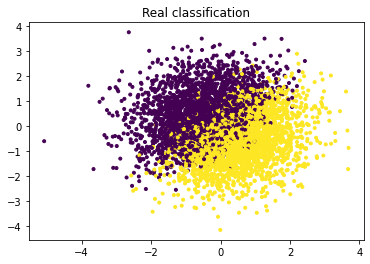

In [11]:
plt.figure()
plt.scatter(x_noisy[:,0],x_noisy[:,1],c=y,s=9)
plt.title('Real classification')
plt.show()

In [12]:
w_estim_noisy=sto_grad_algo(x_noisy,y)
print('Estimation w*:',w_estim_noisy)
print('Distance du vecteur:',np.linalg.norm(w_estim_noisy-w_clas))

Estimation w*: [ 0.75359652 -0.65733727]
Distance du vecteur: 0.06810506128292824


Il y a une augmentation de la distance de notre estimateur au valeur réel produit par l'effet du bruit. Mais, cette augmentation est petite. Alors, on peut déduire que l'algorithme n'est pas très affecté par le bruit.

### 5. Tester l'agorithme dans le ensemble de données Breast Cancer Wisconsin (Diagnostic):

L'ensemble de données à utiliser a le cible, la classification de chaque cancer comme benigne et maligne et dix caractéristiques à valeur réelle sont calculées pour chaque noyau cellulaire. En plus, il y a un ID de chaque observation qu'on n'utilisera pas pour notre algorithme. Pour les données manquantes, on ne les considérara pas.

In [13]:
import pandas as pd
import sklearn 
from sklearn.preprocessing import Normalizer 
from sklearn.model_selection import train_test_split

/Users/ramondanielregueiroespino/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [14]:
with open("breast-cancer-wisconsin.names") as f:
    print(f.read())

Citation Request:
   This breast cancer databases was obtained from the University of Wisconsin
   Hospitals, Madison from Dr. William H. Wolberg.  If you publish results
   when using this database, then please include this information in your
   acknowledgements.  Also, please cite one or more of:

   1. O. L. Mangasarian and W. H. Wolberg: "Cancer diagnosis via linear 
      programming", SIAM News, Volume 23, Number 5, September 1990, pp 1 & 18.

   2. William H. Wolberg and O.L. Mangasarian: "Multisurface method of 
      pattern separation for medical diagnosis applied to breast cytology", 
      Proceedings of the National Academy of Sciences, U.S.A., Volume 87, 
      December 1990, pp 9193-9196.

   3. O. L. Mangasarian, R. Setiono, and W.H. Wolberg: "Pattern recognition 
      via linear programming: Theory and application to medical diagnosis", 
      in: "Large-scale numerical optimization", Thomas F. Coleman and Yuying
      Li, editors, SIAM Publications, Philadelphia 199

In [15]:
names=['ID','Thickness','cell_size_uniformity','cell_shape_uniformity','marginal_adhesion',
       'single_epithelial_cell_size','bare_nuclei','bland_chromatin','normal_nucleoli',
       'mitoses','class']
data=pd.read_csv('breast-cancer-wisconsin.data',na_values='?',names=names)
print(len(data))
data[0:5]

699


,ID,Thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


In [16]:
data.index=data.iloc[:,0]
data=data.iloc[:,1:]
data.dropna(inplace=True)
print(len(data))
data[0:5]

683


,Thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
ID,,,,,,,,,,
1000025,5,1,1,1,2,1.0,3,1,1,2
1002945,5,4,4,5,7,10.0,3,2,1,2
1015425,3,1,1,1,2,2.0,3,1,1,2
1016277,6,8,8,1,3,4.0,3,7,1,2
1017023,4,1,1,3,2,1.0,3,1,1,2


In [17]:
x_cancer=data.drop('class',axis=1)
y_cancer=np.where(data['class']==2,-1,1)
# séparation train et test pour mesurer la performance du modèle
x_train, x_test, y_train, y_test = train_test_split(x_cancer,y_cancer,random_state=2022)
# normalisation des données
scaler = Normalizer().fit(x_train)
x_train_norm= scaler.transform(x_train)
x_test_norm = scaler.transform(x_test)

In [18]:
w_estim=sto_grad_algo(x_train_norm,y_train)

In [19]:
# Matrice de confussion:
y_pred=np.where(x_test_norm.dot(w_estim)>0,1,-1)
M=sklearn.metrics.confusion_matrix(y_test, y_pred)/len(y_pred)
print(M)
print('Proportion des données mal classé:',M[1,0]+M[0,1])

[[0.66081871 0.04093567]
 [0.20467836 0.09356725]]
Proportion des données mal classé: 0.24561403508771928


On a que la proportion de données du ensemble test mal classifié est de presque 0.25. Alors, on considére que cet  algorithme peut n'être pas la meilleur option pour la detection du cancer en considérant ce nombre de données et ces variables explicatives.